In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [327]:
df=pd.read_csv('https://raw.githubusercontent.com/abhijitshow07/Avocado-Price-Prediction-in-USA/master/avocado.csv')

In [328]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [329]:
df.shape

(18249, 14)

In [330]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [332]:
# date column datatype is object change to date format
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)


In [333]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [334]:
df['4046'].value_counts()

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64

In [335]:
df=df[df['4046']>0]

In [336]:
df['4046'].value_counts()

3.00       10
1.24        8
4.00        8
1.00        8
6.00        7
           ..
1486.31     1
1761.80     1
1772.26     1
1803.39     1
2894.77     1
Name: 4046, Length: 17701, dtype: int64

In [247]:
df.shape

(18007, 15)

In [ ]:
# here we add two more columns month and day

In [248]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [110]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [249]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [112]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18007 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18007 non-null  datetime64[ns]
 1   AveragePrice  18007 non-null  float64       
 2   Total Volume  18007 non-null  float64       
 3   4046          18007 non-null  float64       
 4   4225          18007 non-null  float64       
 5   4770          18007 non-null  float64       
 6   Total Bags    18007 non-null  float64       
 7   Small Bags    18007 non-null  float64       
 8   Large Bags    18007 non-null  float64       
 9   XLarge Bags   18007 non-null  float64       
 10  type          18007 non-null  object        
 11  year          18007 non-null  int64         
 12  region        18007 non-null  object        
 13  Month         18007 non-null  int64         
 14  Day           18007 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [337]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    17995
4046            17701
4225            17871
4770            12071
Total Bags      17861
Small Bags      17126
Large Bags      14916
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [338]:
for i in df.columns:
    print(df[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18007, dtype: datetime64[ns]>


<bound method IndexOpsMixin.value_counts of 0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18007, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0         64236.62
1         54876.98
2        118220.22
3         78992.15
4         51039.60
           ...    
18244     17074.83
18245     13888.04
18246     13766.76
18247     16205.22
18248     17489.58
Name: Total Volume, Length: 18007, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0        1036.74
1         674.28
2         794.70
3        1132.00
4         941.48
         

In [339]:
df.drop_duplicates(inplace=True)

In [340]:
df.duplicated().sum()

0

In [341]:
df.shape

(18007, 15)

In [342]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18007.000000,1.800700e+04,1.800700e+04,1.800700e+04,1.800700e+04,1.800700e+04,1.800700e+04,1.800700e+04,18007.000000,18007.000000,18007.000000,18007.000000
mean,1.402976,8.620137e+05,2.969462e+05,2.991132e+05,2.314668e+04,2.428055e+05,1.846044e+05,5.505293e+04,3148.174450,2016.146998,6.180652,15.672016
std,0.402906,3.475273e+06,1.273002e+06,1.211697e+06,1.081510e+05,9.924668e+05,7.508842e+05,2.455214e+05,17807.703688,0.941706,3.536181,8.778865
min,0.440000,8.456000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.145285e+04,9.467450e+02,3.229310e+03,0.000000e+00,5.407820e+03,3.102245e+03,1.314550e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.124432e+05,9.273690e+03,3.033571e+04,2.031600e+02,4.156331e+04,2.752459e+04,2.791720e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.416592e+05,1.138096e+05,1.542486e+05,6.422800e+03,1.128234e+05,8.469024e+04,2.273264e+04,143.330000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [256]:
df['4225'].value_counts()

0.00          61
1.26           3
1.30           3
177.87         3
5.85           2
              ..
1517908.04     1
1580024.38     1
1793496.44     1
1627754.26     1
2356.13        1
Name: 4225, Length: 17871, dtype: int64

In [343]:
df=df[df['4225']>0]

In [344]:
df.shape

(17946, 15)

In [259]:
df['4770'].value_counts()

0.00      5194
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64

In [345]:
df['4770']=df['4770'].replace(0,df['4770'].mean())

In [346]:
df['4770']=df['4770'].replace(0,df['4770'].mean())
df['Total Bags']=df['Total Bags'].replace(0,df['Total Bags'].mean())
df['Small Bags']=df['Small Bags'].replace(0,df['Small Bags'].mean())
df['Large Bags']=df['Large Bags'].replace(0,df['Large Bags'].mean())
df['XLarge Bags']=df['XLarge Bags'].replace(0,df['XLarge Bags'].mean())

In [347]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,17946.000000,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,17946.000000,17946.000000,17946.000000,17946.000000
mean,1.402544,8.649340e+05,2.979545e+05,3.001299e+05,2.994733e+04,2.438257e+05,1.868549e+05,6.226940e+04,5226.243648,2016.147609,6.179260,15.669843
std,0.403413,3.480813e+06,1.275046e+06,1.213629e+06,1.073930e+05,9.940282e+05,7.518814e+05,2.450258e+05,17531.494300,0.942184,3.536604,8.779529
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000,1.000000,1.000000
25%,1.090000,1.162009e+04,9.688800e+02,3.292867e+03,3.541150e+02,5.544395e+03,3.427903e+03,9.301000e+02,3158.875367,2015.000000,3.000000,8.000000
50%,1.370000,1.135846e+05,9.408145e+03,3.061891e+04,1.011449e+04,4.211840e+04,2.946690e+04,8.277290e+03,3158.875367,2016.000000,6.000000,16.000000
75%,1.660000,4.440029e+05,1.141183e+05,1.554702e+05,2.322536e+04,1.139723e+05,8.748286e+04,5.523908e+04,3158.875367,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [ ]:
# data ststistics shows no null values present
# no missing values and ngative values 
# datatype of each column is apropriate 

In [348]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [182]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,Albany,11,29


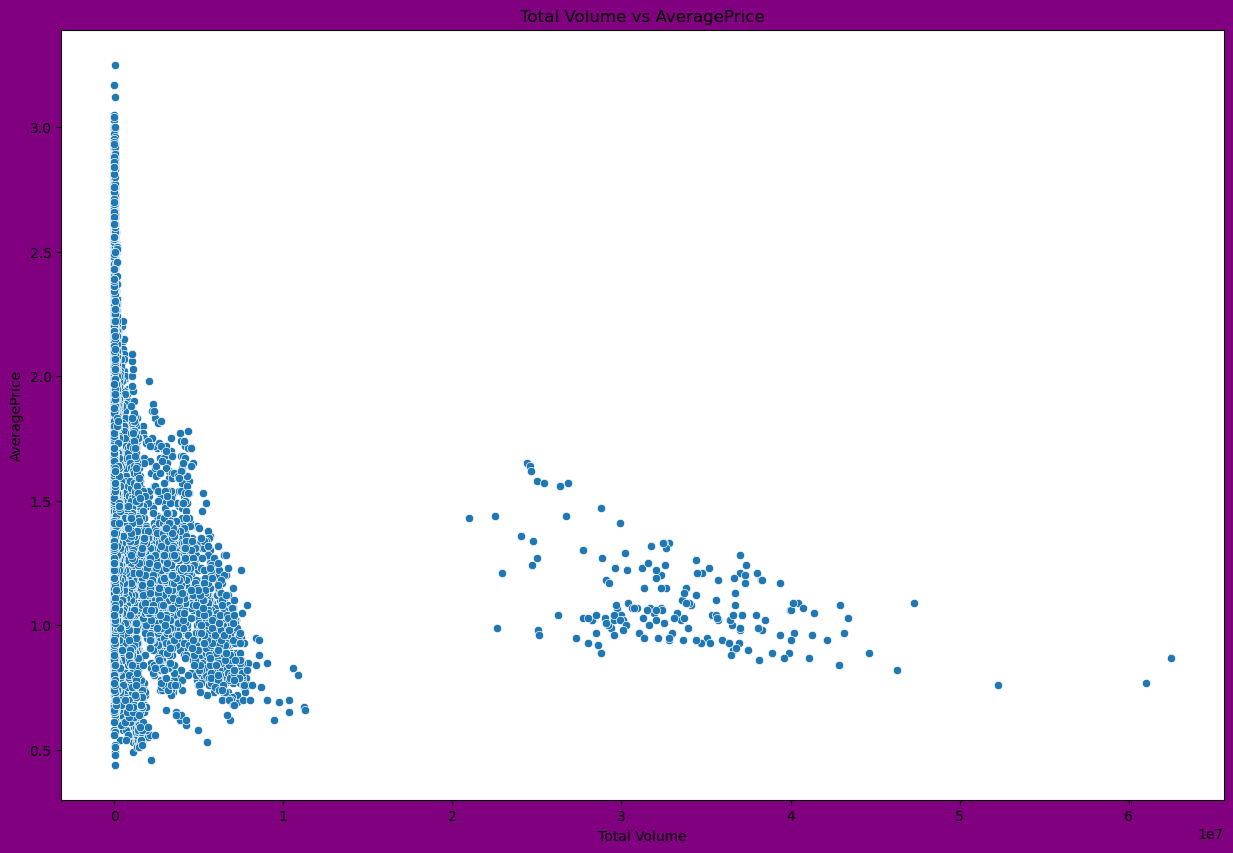

In [73]:
# target variable is average price so its regression  problem  
# lets visualise data average price and total volume
plt.figure(figsize=(15,10),facecolor='purple')
sns.scatterplot(x=df['Total Volume'],y=df['AveragePrice'])
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Total Volume vs AveragePrice')
plt.show()

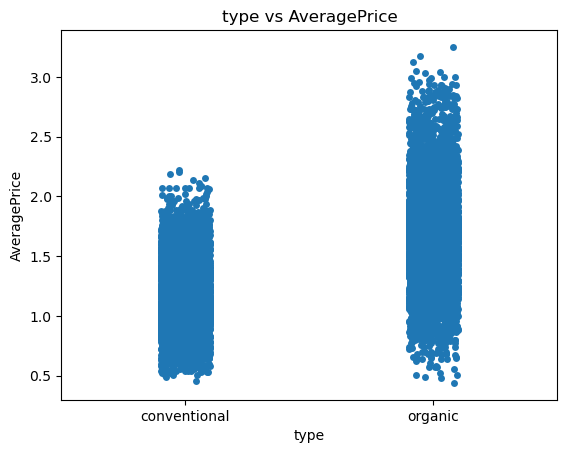

In [75]:
sns.stripplot(x='type',y='AveragePrice',data=df)
plt.title('type vs AveragePrice')
plt.show()

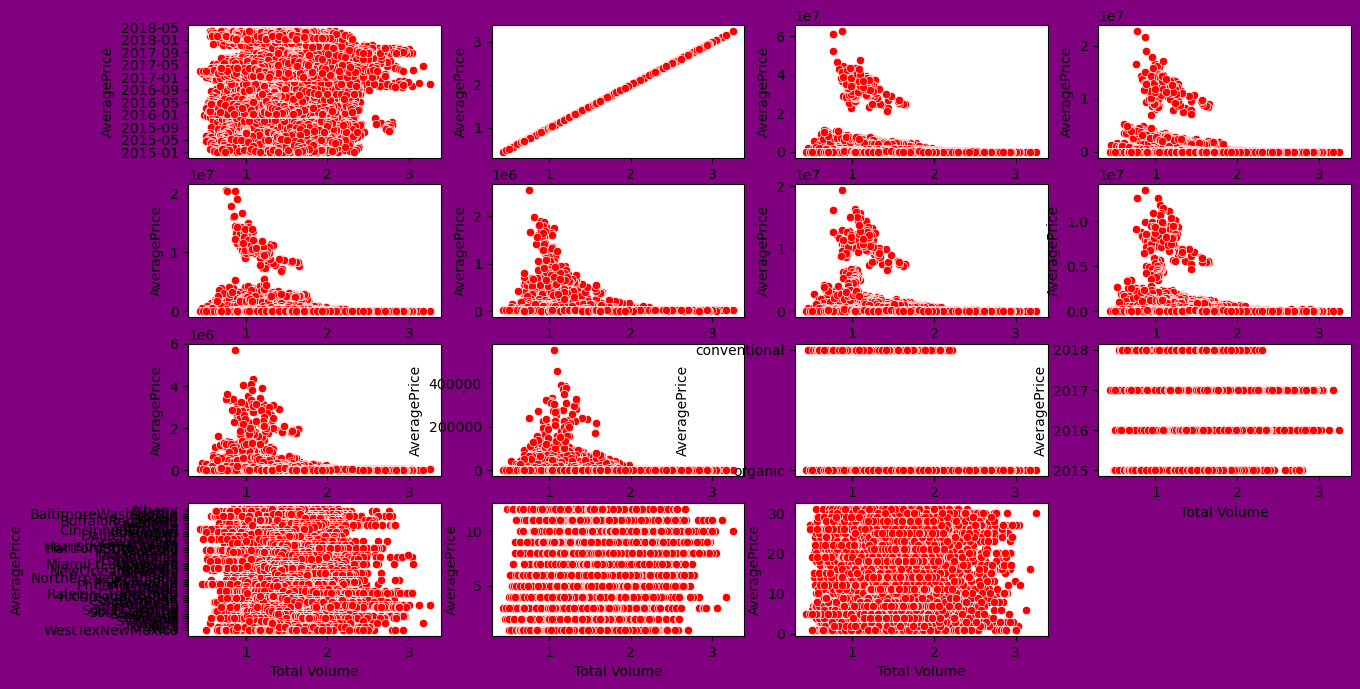

In [76]:
plt.figure(figsize=(15,10),facecolor='purple')
p=1
for i in df:
    if p<18:
        plt.subplot(5,4,p)
        sns.scatterplot(x='AveragePrice',y=i,data=df,color='red')
        plt.xlabel('Total Volume')
        plt.ylabel('AveragePrice')
    p+=1
plt.show()

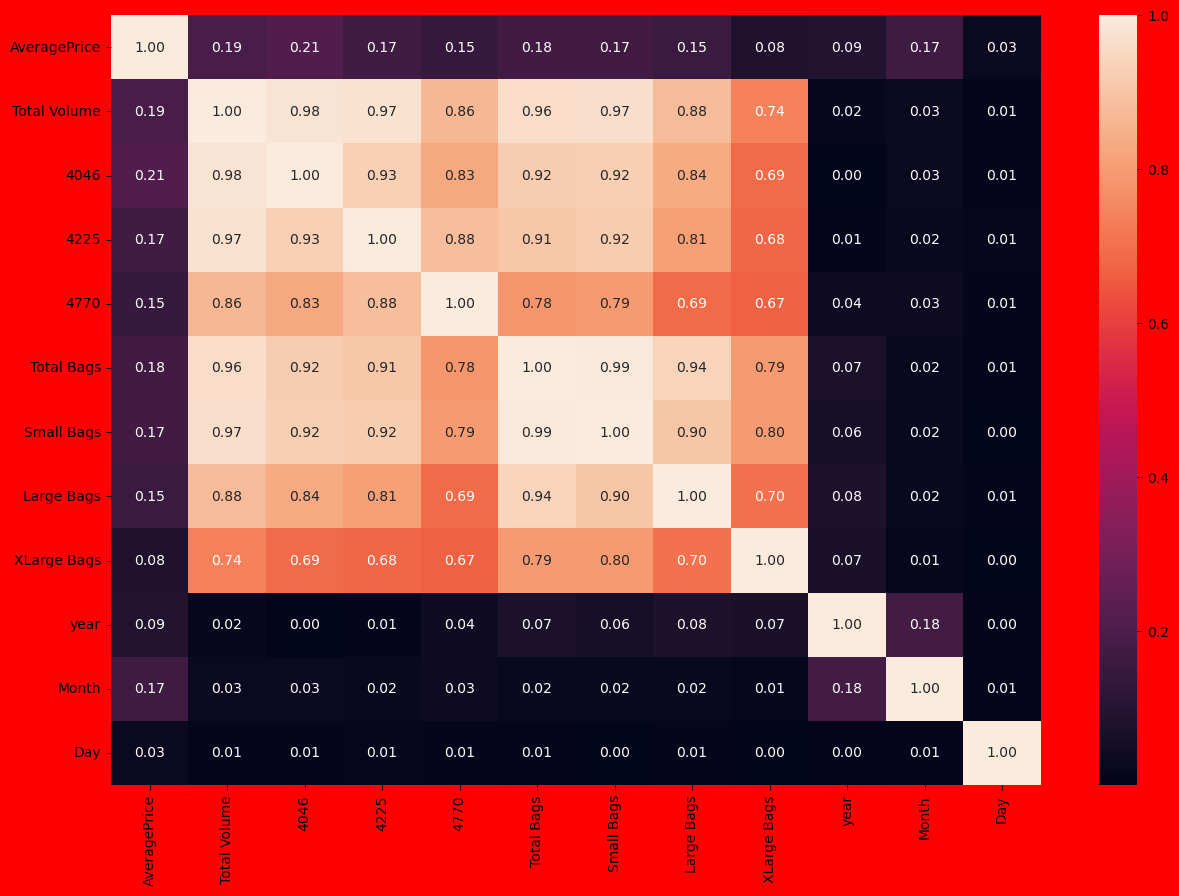

In [183]:
df_corr=df.corr().abs()
plt.figure(figsize=(15,10),facecolor='red')
sns.heatmap(df_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

In [ ]:
# we can see that some features are strongly corelated like total volume and XLarge bags, total volume and large bags, total volume and small bags
# large bags and total bags 

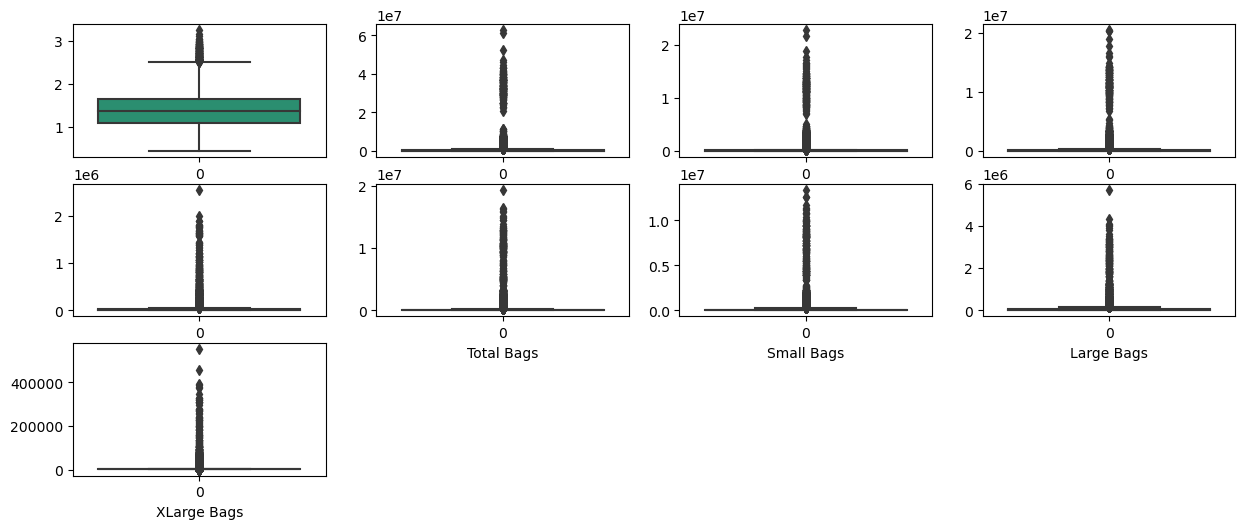

In [349]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if p<18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [350]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,Albany,11,29


In [351]:
# no need of date column 
df.drop('Date',axis=1,inplace=True)

In [352]:
from numpy import percentile
columns=df.columns
for i in columns:
    if isinstance(df[i][0],str):
        continue
    else:
        quartiles=percentile(df[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[i]=df[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))

In [353]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,Albany,11,29


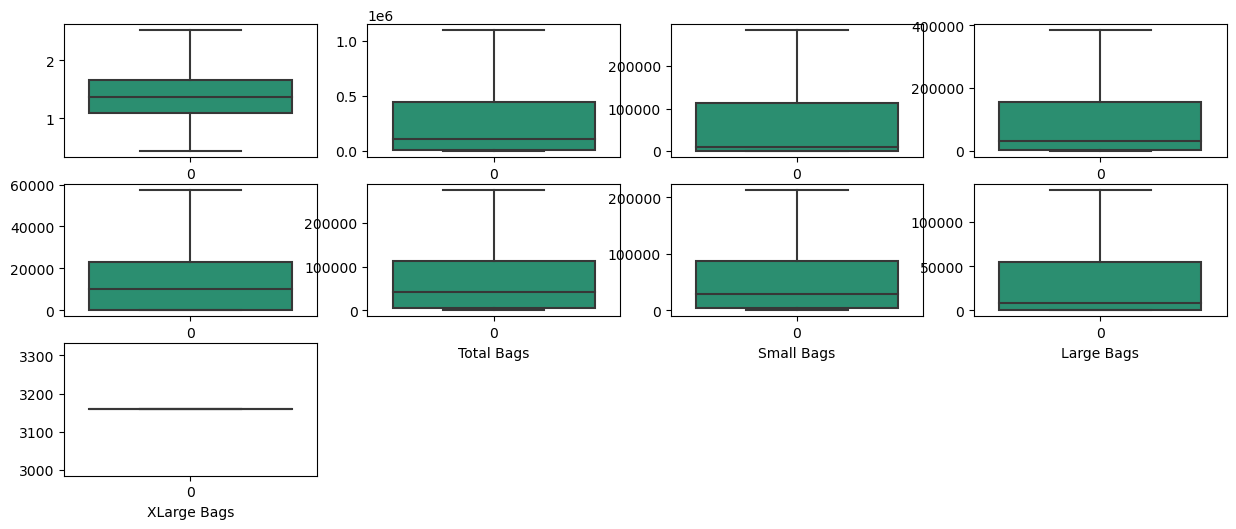

In [354]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if p<18:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [355]:
# removed outliers 
# since our dataset contains categorical column so like type,month and region 
# we apply onehot encoder to convert contineous data for region column
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_dummies=pd.DataFrame()
column_values_reshape=df['region'].values.reshape(-1,1)
encoded_column=ohe.fit_transform(column_values_reshape)
df_encoded=pd.concat([df_dummies,pd.DataFrame(encoded_column.toarray(),columns=ohe.get_feature_names_out(['region']))],axis=1)

In [362]:
df_encoded.isna().sum()

region_Albany                 0
region_Atlanta                0
region_BaltimoreWashington    0
region_Boise                  0
region_Boston                 0
region_BuffaloRochester       0
region_California             0
region_Charlotte              0
region_Chicago                0
region_CincinnatiDayton       0
region_Columbus               0
region_DallasFtWorth          0
region_Denver                 0
region_Detroit                0
region_GrandRapids            0
region_GreatLakes             0
region_HarrisburgScranton     0
region_HartfordSpringfield    0
region_Houston                0
region_Indianapolis           0
region_Jacksonville           0
region_LasVegas               0
region_LosAngeles             0
region_Louisville             0
region_MiamiFtLauderdale      0
region_Midsouth               0
region_Nashville              0
region_NewOrleansMobile       0
region_NewYork                0
region_Northeast              0
region_NorthernNewEngland     0
region_O

In [356]:
df.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [357]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [358]:
df.drop('region',axis=1,inplace=True)

In [359]:
df=pd.concat([df,df_encoded],axis=1)

In [360]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month',
       'Day', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsbu

In [273]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [363]:
df.isna().sum()

AveragePrice               299
Total Volume               299
4046                       299
4225                       299
4770                       299
                          ... 
region_Syracuse            299
region_Tampa               299
region_TotalUS             299
region_West                299
region_WestTexNewMexico    299
Length: 67, dtype: int64

In [364]:
df['AveragePrice'].unique()

array([1.33 , 1.35 , 0.93 , 1.08 , 1.28 , 1.26 , 0.99 , 0.98 , 1.02 ,
       1.07 , 1.12 , 1.31 , 1.11 , 1.34 , 1.45 , 1.05 , 1.37 , 1.27 ,
       1.32 , 1.23 , 1.19 , 1.43 , 1.2  , 1.22 , 1.13 , 1.16 , 1.06 ,
       1.17 , 1.24 , 0.96 , 1.   , 1.09 , 0.95 , 0.97 , 1.15 , 1.01 ,
       1.14 , 1.1  , 1.04 , 1.03 , 1.18 , 1.29 , 1.25 , 0.71 , 0.94 ,
       0.91 , 1.39 , 1.4  , 1.36 , 1.3  , 1.54 , 1.59 , 1.56 , 1.38 ,
       1.49 , 1.5  , 1.47 , 1.42 , 1.41 , 1.44 , 1.52 , 0.9  , 0.87 ,
       0.78 , 0.92 , 0.83 , 0.88 , 0.84 , 0.85 , 1.21 , 0.79 , 0.89 ,
       0.86 , 0.8  , 0.82 , 0.74 , 0.81 , 0.77 , 0.75 , 0.65 , 0.73 ,
       0.68 , 0.72 , 0.67 , 0.76 , 0.62 , 0.7  , 0.66 , 1.46 , 0.49 ,
       0.53 , 0.56 , 0.6  , 0.58 , 0.54 , 0.52 , 0.51 , 0.57 , 0.63 ,
       0.64 , 0.61 , 1.48 , 1.55 , 1.58 , 1.53 , 1.57 , 1.51 , 0.69 ,
       1.62 , 1.63 , 1.61 , 1.6  , 1.73 , 1.8  , 1.86 , 1.85 , 1.69 ,
       1.66 , 1.65 , 1.64 , 1.67 , 1.68 , 1.82 , 2.07 , 1.84 , 1.83 ,
       1.7  , 1.72 ,

In [365]:
df['AveragePrice']=df['AveragePrice'].fillna(df['AveragePrice'].mean())

In [366]:
df['AveragePrice'].unique()

array([1.33      , 1.35      , 0.93      , 1.08      , 1.28      ,
       1.26      , 0.99      , 0.98      , 1.02      , 1.07      ,
       1.12      , 1.31      , 1.11      , 1.34      , 1.45      ,
       1.05      , 1.37      , 1.27      , 1.32      , 1.23      ,
       1.19      , 1.43      , 1.2       , 1.22      , 1.13      ,
       1.16      , 1.06      , 1.17      , 1.24      , 0.96      ,
       1.        , 1.09      , 0.95      , 0.97      , 1.15      ,
       1.01      , 1.14      , 1.1       , 1.04      , 1.03      ,
       1.18      , 1.29      , 1.25      , 0.71      , 0.94      ,
       0.91      , 1.39      , 1.4       , 1.36      , 1.3       ,
       1.54      , 1.59      , 1.56      , 1.38      , 1.49      ,
       1.5       , 1.47      , 1.42      , 1.41      , 1.44      ,
       1.52      , 0.9       , 0.87      , 0.78      , 0.92      ,
       0.83      , 0.88      , 0.84      , 0.85      , 1.21      ,
       0.79      , 0.89      , 0.86      , 0.8       , 0.82   

In [367]:
df.isna().sum()

AveragePrice                 0
Total Volume               299
4046                       299
4225                       299
4770                       299
                          ... 
region_Syracuse            299
region_Tampa               299
region_TotalUS             299
region_West                299
region_WestTexNewMexico    299
Length: 67, dtype: int64

In [201]:
df['Total Volume']=df['Total Volume'].fillna(df['Total Volume'].mean())
df['4046']=df['4046'].fillna(df['4046'].mean())
df['4225']=df['4225'].fillna(df['4225'].mean())
df['4770']=df['4770'].fillna(df['4770'].mean())
df['region_Syracuse']=df['region_Syracuse'].fillna(df['region_Syracuse'].mean())
df['region_Tampa']=df['region_Tampa'].fillna(df['region_Tampa'].mean())
df['region_TotalUS']=df['region_TotalUS'].fillna(df['region_TotalUS'].mean())
df['region_West']=df['region_West'].fillna(df['region_West'].mean())
df['region_WestTexNewMexico']=df['region_WestTexNewMexico'].fillna(df['region_WestTexNewMexico'].mean())



In [368]:
df=df.dropna()

In [370]:
df.isna().sum()

AveragePrice               0
Total Volume               0
4046                       0
4225                       0
4770                       0
                          ..
region_Syracuse            0
region_Tampa               0
region_TotalUS             0
region_West                0
region_WestTexNewMexico    0
Length: 67, dtype: int64

KeyError: 'Month_9.0'

In [371]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
               ..
Month_8.0       0
Month_9.0       0
Month_10.0      0
Month_11.0      0
Month_12.0      0
Length: 78, dtype: int64

In [372]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
from sklearn.preprocessing import LabelEncoder
le_en=LabelEncoder()
df['type']=le_en.fit_transform(df['type'])

In [374]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
df['type'].value_counts()

0    9126
1    8521
Name: type, dtype: int64

In [376]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month',
       'Day', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsbu

In [275]:
)

In [377]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
df.isna().sum()

AveragePrice               0
Total Volume               0
4046                       0
4225                       0
4770                       0
                          ..
region_Syracuse            0
region_Tampa               0
region_TotalUS             0
region_West                0
region_WestTexNewMexico    0
Length: 67, dtype: int64

1.150    201
1.180    198
2.515    197
1.080    192
1.130    191
        ... 
0.550      3
0.490      2
0.460      1
0.440      1
0.480      1
Name: AveragePrice, Length: 206, dtype: int64

In [284]:
df.isna().sum()

AveragePrice    303
Total Volume    303
4046            303
4225            303
4770            303
               ... 
Month_9.0         4
Month_10.0        4
Month_11.0        4
Month_12.0        4
Month_nan         4
Length: 79, dtype: int64

AveragePrice    4
Total Volume    4
4046            4
4225            4
4770            4
               ..
Month_8.0       4
Month_9.0       4
Month_10.0      4
Month_11.0      4
Month_12.0      4
Length: 78, dtype: int64

array([0.        , 1.        , 0.07613045])

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
               ..
Month_8.0       0
Month_9.0       0
Month_10.0      0
Month_11.0      0
Month_12.0      0
Length: 78, dtype: int64

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
               ..
Month_8.0       0
Month_9.0       0
Month_10.0      0
Month_11.0      0
Month_12.0      0
Length: 78, dtype: int64

In [379]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [394]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [395]:
vif

,VIF Values,features
0,53.633835,Total Volume
1,10.550803,4046
2,16.983375,4225
3,1.802019,4770
4,23.207895,Total Bags
...,...,...
61,inf,region_Syracuse
62,inf,region_Tampa
63,inf,region_TotalUS
64,inf,region_West


In [396]:
x.drop(columns=['Total Volume','region_Syracuse','region_Tampa','region_TotalUS','region_West','region_WestTexNewMexico'],axis=1,inplace=True)

In [397]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [398]:
vif

,VIF Values,features
0,4.986450,4046
1,5.705413,4225
2,1.724665,4770
3,17.826185,Total Bags
4,11.569977,Small Bags
5,2.644277,Large Bags
6,1.000000,XLarge Bags
7,2.810821,type
8,1.166988,year
9,1.032231,Month


In [399]:
x.isna().sum()

4046                          0
4225                          0
4770                          0
Total Bags                    0
Small Bags                    0
Large Bags                    0
XLarge Bags                   0
type                          0
year                          0
Month                         0
Day                           0
region_Albany                 0
region_Atlanta                0
region_BaltimoreWashington    0
region_Boise                  0
region_Boston                 0
region_BuffaloRochester       0
region_California             0
region_Charlotte              0
region_Chicago                0
region_CincinnatiDayton       0
region_Columbus               0
region_DallasFtWorth          0
region_Denver                 0
region_Detroit                0
region_GrandRapids            0
region_GreatLakes             0
region_HarrisburgScranton     0
region_HartfordSpringfield    0
region_Houston                0
region_Indianapolis           0
region_J

In [314]:
x.isna().sum()

Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
               ..
Month_8.0       0
Month_9.0       0
Month_10.0      0
Month_11.0      0
Month_12.0      0
Length: 77, dtype: int64

In [381]:
x.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'Month', 'Day',
       'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh',
       're

In [382]:
x.dtypes

Total Volume               float64
4046                       float64
4225                       float64
4770                       float64
Total Bags                 float64
                            ...   
region_Syracuse            float64
region_Tampa               float64
region_TotalUS             float64
region_West                float64
region_WestTexNewMexico    float64
Length: 66, dtype: object

In [383]:
x.shape

(17647, 66)

In [400]:
y.shape

(17647,)

(17946,)

In [386]:
y.value_counts()

1.150    201
1.180    197
2.515    197
1.080    192
1.130    191
        ... 
0.520      3
0.490      2
0.460      1
0.440      1
0.480      1
Name: AveragePrice, Length: 206, dtype: int64

In [401]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,...,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis
0,-0.701215,-0.355836,-0.896725,-0.755386,-0.723386,-0.739388,0.0,-0.966285,-1.215314,1.632462,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
1,-0.704757,-0.427111,-0.896114,-0.746937,-0.712433,-0.739284,0.0,-0.966285,-1.215314,1.632462,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
2,-0.703580,0.041307,-0.891777,-0.761149,-0.731030,-0.739145,0.0,-0.966285,-1.215314,1.632462,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
3,-0.700284,-0.228611,-0.895258,-0.785537,-0.763227,-0.738393,0.0,-0.966285,-1.215314,1.632462,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
4,-0.702146,-0.432923,-0.895066,-0.781642,-0.759022,-0.736823,0.0,-0.966285,-1.215314,1.348549,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,-0.590466,-0.437575,-0.886524,-0.257565,-0.073394,0.614651,0.0,1.034892,2.051005,-1.206665,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
17643,0.337902,1.644602,-0.842150,-0.252777,-0.083741,-0.711766,0.0,1.034892,2.051005,-1.206665,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
17644,-0.646807,-0.637616,-0.847706,-0.253196,-0.090100,-0.701282,0.0,1.034892,2.051005,-1.206665,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107
17645,-0.620457,-0.595645,-0.850677,-0.202010,-0.002967,-0.738128,0.0,1.034892,2.051005,-1.206665,...,-0.139318,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139741,-0.139107


In [388]:
x.shape

(17647, 66)

In [389]:
y.shape

(17647,)

In [402]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


In [404]:
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('maximum accuracy ',maxACC,'on Random state ',maxRS)

maximum accuracy  0.7459265476062618 on Random state  153


In [405]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)


In [406]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('Accuracy score ',r2_score(y_test,GBR_pred)*100)
print('Accuracy score for training',r2_score(y_train,pred_train)*100)
print('Mean absolute error ',mean_absolute_error(y_test,GBR_pred))
print('Mean squared error ',mean_squared_error(y_test,GBR_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,GBR_pred)))

Accuracy score  74.59265476062617
Accuracy score for training 74.44078938854312
Mean absolute error  0.15110837096530594
Mean squared error  0.03954950490402115
Root Mean squared error  0.19887057324808302


In [407]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_pred_train=lr.predict(x_train)
print('Accuracy score ',r2_score(y_test,lr_pred))
print('Accuracy score for training',r2_score(y_train,lr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,lr_pred))
print('Mean squared error ',mean_squared_error(y_test,lr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,lr_pred)))

Accuracy score  0.5360571700164345
Accuracy score for training 0.5211225808162419
Mean absolute error  0.20586966668602869
Mean squared error  0.07221812848508644
Root Mean squared error  0.26873430835136486


In [408]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)
dt_pred=lr.predict(x_test)
dt_pred_train=dt.predict(x_train)
print('Accuracy score ',r2_score(y_test,dt_pred))
print('Accuracy score for training',r2_score(y_train,dt_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,dt_pred))
print('Mean squared error ',mean_squared_error(y_test,dt_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,dt_pred)))

Accuracy score  0.5360571700164345
Accuracy score for training 0.9996932590844749
Mean absolute error  0.20586966668602869
Mean squared error  0.07221812848508644
Root Mean squared error  0.26873430835136486


In [409]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
print('Accuracy score ',r2_score(y_test,knn_pred))
print('Accuracy score for training',r2_score(y_train,knn_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,knn_pred))
print('Mean squared error ',mean_squared_error(y_test,knn_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,knn_pred)))

Accuracy score  0.7819689140984474
Accuracy score for training 0.8563346907419125
Mean absolute error  0.13081756373937678
Mean squared error  0.033939088951841355
Root Mean squared error  0.18422564683518242


In [410]:
from sklearn.linear_model import Ridge,Lasso
ridge=Ridge()

ridge.fit(x_train,y_train)
ridge_pred=ridge.predict(x_test)
ridge_pred_train=ridge.predict(x_train)
print('Accuracy score ',r2_score(y_test,ridge_pred))
print('Accuracy score for training',r2_score(y_train,ridge_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,ridge_pred))
print('Mean squared error ',mean_squared_error(y_test,ridge_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,ridge_pred)))

Accuracy score  0.5360578604609889
Accuracy score for training 0.521122523374081
Mean absolute error  0.20587006676673983
Mean squared error  0.07221802100931501
Root Mean squared error  0.2687341083846913


In [412]:
lasso=Lasso()

lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
lasso_pred_train=lasso.predict(x_train)
print('Accuracy score ',r2_score(y_test,lasso_pred))
print('Accuracy score for training',r2_score(y_train,lasso_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,lasso_pred))
print('Mean squared error ',mean_squared_error(y_test,lasso_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,lasso_pred)))

Accuracy score  -0.0006355416461283347
Accuracy score for training 0.0
Mean absolute error  0.3228008127544373
Mean squared error  0.15576062704946642
Root Mean squared error  0.3946652088156067


In [413]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
ada_pred_train=ada.predict(x_train)
print('Accuracy score ',r2_score(y_test,ada_pred))
print('Accuracy score for training',r2_score(y_train,ada_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,ada_pred))
print('Mean squared error ',mean_squared_error(y_test,ada_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,ada_pred)))

Accuracy score  0.5875745836123814
Accuracy score for training 0.5802827988597608
Mean absolute error  0.20387962718579392
Mean squared error  0.06419884043094576
Root Mean squared error  0.25337490094905957


In [414]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_pred_train=svm.predict(x_train)
print('Accuracy score ',r2_score(y_test,svm_pred))
print('Accuracy score for training',r2_score(y_train,svm_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,svm_pred))
print('Mean squared error ',mean_squared_error(y_test,svm_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,svm_pred)))

Accuracy score  0.7245030191815327
Accuracy score for training 0.7361598802605323
Mean absolute error  0.14786259085832787
Mean squared error  0.04288432770629571
Root Mean squared error  0.2070853150426068


In [415]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_pred_train=etr.predict(x_train)
print('Accuracy score ',r2_score(y_test,etr_pred))
print('Accuracy score for training',r2_score(y_train,etr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,etr_pred))
print('Mean squared error ',mean_squared_error(y_test,etr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,etr_pred)))

Accuracy score  0.9284753498815689
Accuracy score for training 0.9996932590844749
Mean absolute error  0.07400087818696885
Mean squared error  0.011133648454674221
Root Mean squared error  0.10551610519098126


In [416]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_pred_train=rfr.predict(x_train)
print('Accuracy score ',r2_score(y_test,rfr_pred))
print('Accuracy score for training',r2_score(y_train,rfr_pred_train))
print('Mean absolute error ',mean_absolute_error(y_test,rfr_pred))
print('Mean squared error ',mean_squared_error(y_test,rfr_pred))
print('Root Mean squared error ',np.sqrt(mean_squared_error(y_test,rfr_pred)))

Accuracy score  0.9002133561133021
Accuracy score for training 0.9852785322204894
Mean absolute error  0.08900208427762042
Mean squared error  0.015532958381015146
Root Mean squared error  0.12463128973502259


In [417]:
from sklearn.model_selection import cross_val_score

In [418]:
val_score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print('Accuracy score ',r2_score(y_test,GBR_pred))
print('cross val score ', val_score)
print('aversge score ',val_score.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,GBR_pred)-val_score.mean()))

Accuracy score  0.7459265476062618
cross val score  [0.07247059 0.50356902 0.57756526 0.20679578 0.21431152]
aversge score  0.3149424346820619
deference between R2 score and cross val score  0.43098411292419986


In [419]:
val_score1=cross_val_score(lr,x,y)
print('Accuracy score ',r2_score(y_test,lr_pred))
print('cross val score ', val_score1)
print('aversge score ',val_score1.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,lr_pred)-val_score1.mean()))

Accuracy score  0.5360571700164345
cross val score  [-0.35945747  0.29258631  0.42110048 -0.11602896  0.0068303 ]
aversge score  0.04900613291477749
deference between R2 score and cross val score  0.487051037101657


In [420]:
val_score2=cross_val_score(dt,x,y)
print('Accuracy score ',r2_score(y_test,dt_pred))
print('cross val score ', val_score2)
print('aversge score ',val_score2.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,dt_pred)-val_score2.mean()))

Accuracy score  0.5360571700164345
cross val score  [-0.97831746  0.34576003  0.16121216 -0.24029327 -0.38723539]
aversge score  -0.21977478560702418
deference between R2 score and cross val score  0.7558319556234587


In [421]:
val_score3=cross_val_score(knn,x,y)
print('Accuracy score ',r2_score(y_test,knn_pred))
print('cross val score ', val_score3)
print('aversge score ',val_score3.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,knn_pred)-val_score3.mean()))

Accuracy score  0.7819689140984474
cross val score  [-0.96439429  0.29759091  0.10147766 -0.91631023 -0.57982655]
aversge score  -0.4122925019697554
deference between R2 score and cross val score  1.1942614160682028


In [422]:
val_score4=cross_val_score(ridge,x,y)
print('Accuracy score ',r2_score(y_test,ridge_pred))
print('cross val score ', val_score4)
print('aversge score ',val_score4.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,ridge_pred)-val_score4.mean()))

Accuracy score  0.5360578604609889
cross val score  [-0.35911194  0.29256301  0.42113324 -0.11607193  0.00682931]
aversge score  0.04906833643561335
deference between R2 score and cross val score  0.48698952402537554


In [423]:
val_score5=cross_val_score(lasso,x,y)
print('Accuracy score ',r2_score(y_test,lasso_pred))
print('cross val score ', val_score5)
print('aversge score ',val_score5.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,lasso_pred)-val_score5.mean()))

Accuracy score  -0.0006355416461283347
cross val score  [-3.98716944e+00 -8.37498097e-01 -3.06463643e-03 -7.14712561e-01
 -7.83351314e-01]
aversge score  -1.2651592091077712
deference between R2 score and cross val score  1.264523667461643


In [424]:
val_score6=cross_val_score(ada,x,y)
print('Accuracy score ',r2_score(y_test,ada_pred))
print('cross val score ', val_score6)
print('aversge score ',val_score6.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,ada_pred)-val_score6.mean()))

Accuracy score  0.5875745836123814
cross val score  [-1.04473105  0.29913256  0.48676884  0.14508781  0.12744349]
aversge score  0.0027403319356801735
deference between R2 score and cross val score  0.5848342516767012


In [425]:
val_score7=cross_val_score(svm,x,y)
print('Accuracy score ',r2_score(y_test,svm_pred))
print('cross val score ', val_score7)
print('aversge score ',val_score7.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,svm_pred)-val_score7.mean()))

Accuracy score  0.7245030191815327
cross val score  [-0.31594553  0.53401651  0.20126255 -0.47898873 -0.4978192 ]
aversge score  -0.11149487982831922
deference between R2 score and cross val score  0.8359978990098519


In [426]:
val_score8=cross_val_score(etr,x,y)
print('Accuracy score ',r2_score(y_test,etr_pred))
print('cross val score ', val_score8)
print('aversge score ',val_score8.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,etr_pred)-val_score8.mean()))

Accuracy score  0.9284753498815689
cross val score  [-0.02220606  0.61981368  0.52700388  0.17882359 -0.12734131]
aversge score  0.23521875354867777
deference between R2 score and cross val score  0.6932565963328912


In [427]:
val_score9=cross_val_score(rfr,x,y)
print('Accuracy score ',r2_score(y_test,rfr_pred))
print('cross val score ', val_score9)
print('aversge score ',val_score9.mean())
print('deference between R2 score and cross val score ',(r2_score(y_test,rfr_pred)-val_score9.mean()))

Accuracy score  0.9002133561133021
cross val score  [-0.2520124   0.54443907  0.53629218  0.23211645 -0.02773073]
aversge score  0.20662091280021921
deference between R2 score and cross val score  0.6935924433130829


In [ ]:
# building lots of model we can see that GradientBoosting regressor model perform better compared to other models

In [ ]:
# completed regression ML model 
# lets build classification model 

In [676]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [677]:
df1=pd.read_csv('https://raw.githubusercontent.com/abhijitshow07/Avocado-Price-Prediction-in-USA/master/avocado.csv')

In [678]:
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [679]:
df1.shape

(18249, 14)

In [680]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [681]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [682]:
# date column datatype is object change to date format
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].apply(lambda x:x.month)
df1['Day']=df1['Date'].apply(lambda x:x.day)

In [683]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [684]:
df1['4046'].value_counts()

0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64

In [685]:
df1=df1[df1['4046']>0]

In [686]:
df1['4046'].value_counts()

3.00       10
1.24        8
4.00        8
1.00        8
6.00        7
           ..
1486.31     1
1761.80     1
1772.26     1
1803.39     1
2894.77     1
Name: 4046, Length: 17701, dtype: int64

In [687]:
df1.shape

(18007, 15)

In [688]:
df1.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [689]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [690]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18007 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18007 non-null  datetime64[ns]
 1   AveragePrice  18007 non-null  float64       
 2   Total Volume  18007 non-null  float64       
 3   4046          18007 non-null  float64       
 4   4225          18007 non-null  float64       
 5   4770          18007 non-null  float64       
 6   Total Bags    18007 non-null  float64       
 7   Small Bags    18007 non-null  float64       
 8   Large Bags    18007 non-null  float64       
 9   XLarge Bags   18007 non-null  float64       
 10  type          18007 non-null  object        
 11  year          18007 non-null  int64         
 12  region        18007 non-null  object        
 13  Month         18007 non-null  int64         
 14  Day           18007 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [691]:
df1.nunique()

Date              169
AveragePrice      259
Total Volume    17995
4046            17701
4225            17871
4770            12071
Total Bags      17861
Small Bags      17126
Large Bags      14916
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [692]:
for i in df1.columns:
    print(df1[i].value_counts)
    print('\n')

<bound method IndexOpsMixin.value_counts of 0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18007, dtype: datetime64[ns]>


<bound method IndexOpsMixin.value_counts of 0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18007, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0         64236.62
1         54876.98
2        118220.22
3         78992.15
4         51039.60
           ...    
18244     17074.83
18245     13888.04
18246     13766.76
18247     16205.22
18248     17489.58
Name: Total Volume, Length: 18007, dtype: float64>


<bound method IndexOpsMixin.value_counts of 0        1036.74
1         674.28
2         794.70
3        1132.00
4         941.48
         

In [693]:
df1.drop_duplicates(inplace=True)

In [694]:
df1.duplicated().sum()

0

In [695]:
df1.shape

(18007, 15)

In [696]:
df1['4225'].value_counts()

0.00          61
1.26           3
1.30           3
177.87         3
5.85           2
              ..
1517908.04     1
1580024.38     1
1793496.44     1
1627754.26     1
2356.13        1
Name: 4225, Length: 17871, dtype: int64

In [697]:
df1=df1[df1['4225']>0]

In [698]:
df1['4225'].value_counts()

177.87        3
1.26          3
1.30          3
33.94         2
215.36        2
             ..
1517908.04    1
1580024.38    1
1793496.44    1
1627754.26    1
2356.13       1
Name: 4225, Length: 17870, dtype: int64

In [699]:
df1.shape

(17946, 15)

In [700]:
df1['4770'].value_counts()

0.00      5194
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, Length: 12071, dtype: int64

In [701]:
df1['4770']=df1['4770'].replace(0,df1['4770'].mean())
df1['Total Bags']=df1['Total Bags'].replace(0,df1['Total Bags'].mean())
df1['Small Bags']=df1['Small Bags'].replace(0,df1['Small Bags'].mean())
df1['Large Bags']=df1['Large Bags'].replace(0,df1['Large Bags'].mean())
df1['XLarge Bags']=df1['XLarge Bags'].replace(0,df1['XLarge Bags'].mean())

In [702]:
df1.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,17946.000000,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,1.794600e+04,17946.000000,17946.000000,17946.000000,17946.000000
mean,1.402544,8.649340e+05,2.979545e+05,3.001299e+05,2.994733e+04,2.438257e+05,1.868549e+05,6.226940e+04,5226.243648,2016.147609,6.179260,15.669843
std,0.403413,3.480813e+06,1.275046e+06,1.213629e+06,1.073930e+05,9.940282e+05,7.518814e+05,2.450258e+05,17531.494300,0.942184,3.536604,8.779529
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000,1.000000,1.000000
25%,1.090000,1.162009e+04,9.688800e+02,3.292867e+03,3.541150e+02,5.544395e+03,3.427903e+03,9.301000e+02,3158.875367,2015.000000,3.000000,8.000000
50%,1.370000,1.135846e+05,9.408145e+03,3.061891e+04,1.011449e+04,4.211840e+04,2.946690e+04,8.277290e+03,3158.875367,2016.000000,6.000000,16.000000
75%,1.660000,4.440029e+05,1.141183e+05,1.554702e+05,2.322536e+04,1.139723e+05,8.748286e+04,5.523908e+04,3158.875367,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [703]:
df1.shape

(17946, 15)

In [704]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,Albany,11,29


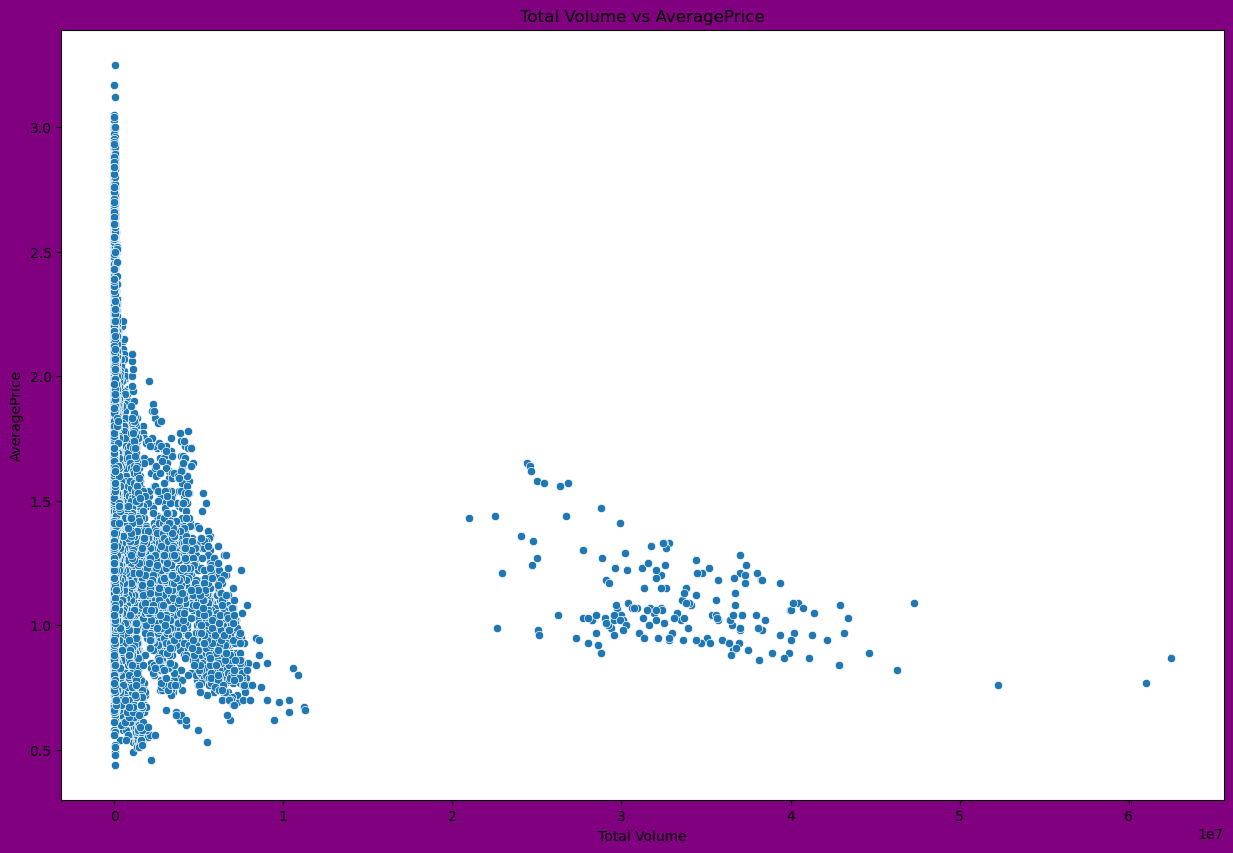

In [705]:
# target variable is region  so its classification   problem  
# lets visualise averageprice and total volume
plt.figure(figsize=(15,10),facecolor='purple')
sns.scatterplot(x=df1['Total Volume'],y=df1['AveragePrice'])
plt.xlabel('Total Volume')
plt.ylabel('AveragePrice')
plt.title('Total Volume vs AveragePrice')
plt.show()

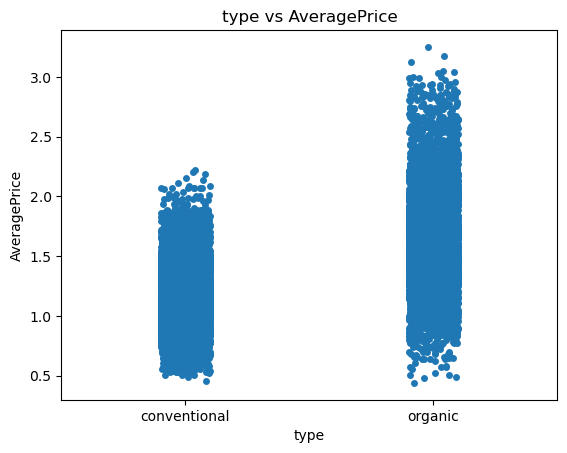

In [706]:
sns.stripplot(x='type',y='AveragePrice',data=df1)
plt.title('type vs AveragePrice')
plt.show()

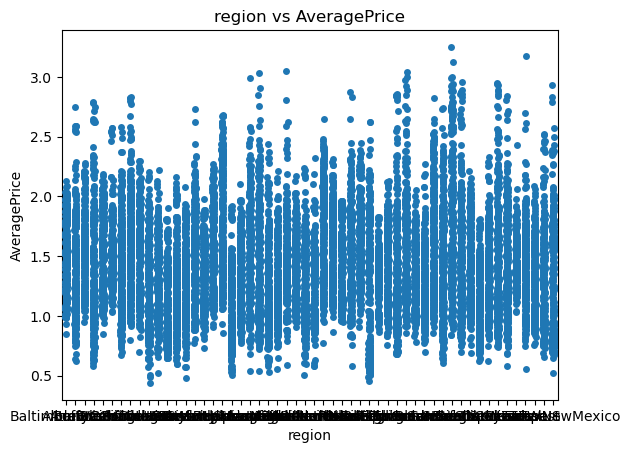

In [707]:
sns.stripplot(x='region',y='AveragePrice',data=df1)
plt.title('region vs AveragePrice')
plt.show()

In [708]:
df1['region'].value_counts()

LosAngeles             338
PhoenixTucson          338
Midsouth               338
Nashville              338
Atlanta                338
NewYork                338
Northeast              338
Southeast              338
Orlando                338
Philadelphia           338
Plains                 338
SouthCentral           338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
Sacramento             338
SanDiego               338
SanFrancisco           338
Seattle                338
Spokane                338
SouthCarolina          338
LasVegas               338
Jacksonville           338
BaltimoreWashington    338
West                   338
TotalUS                338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
StLouis                338
GreatLakes             338
H

In [709]:
df1['region'].nunique()

54

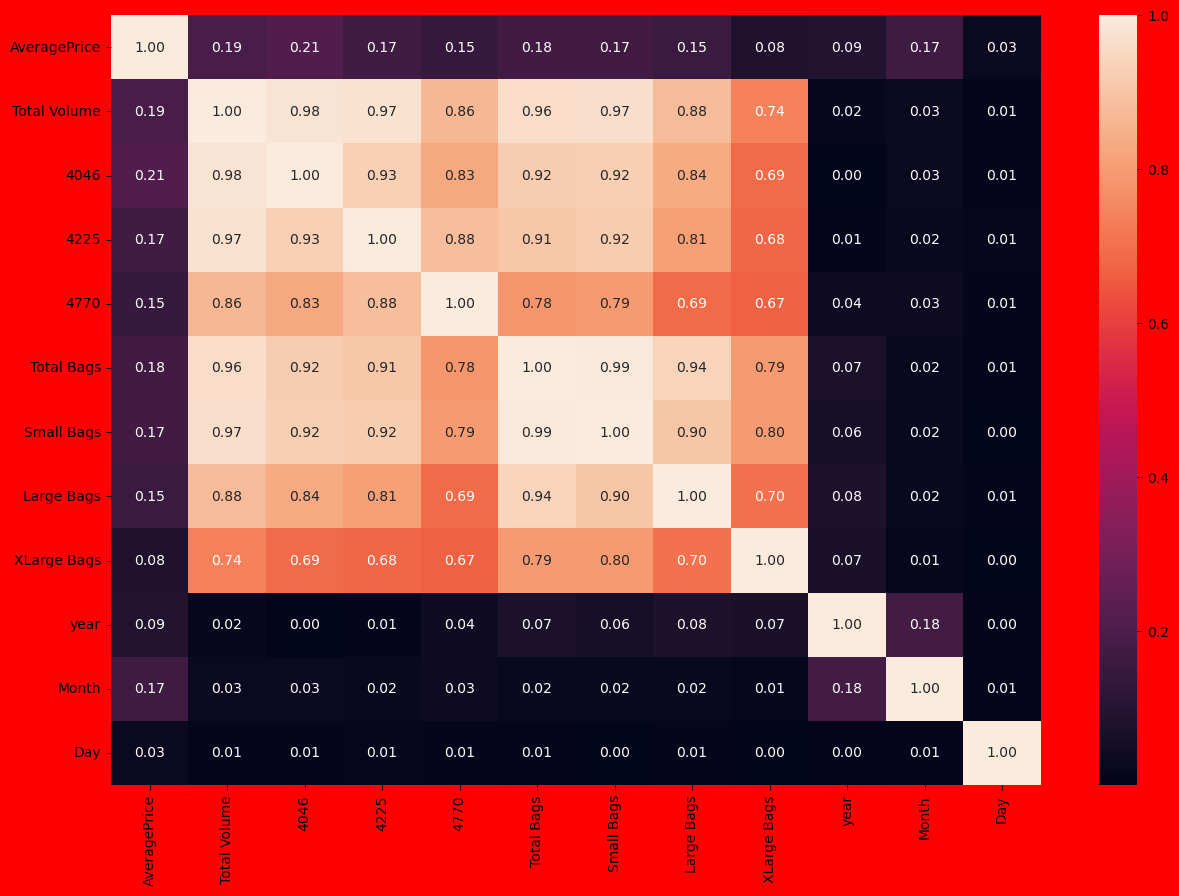

In [710]:
df_corr=df1.corr().abs()
plt.figure(figsize=(15,10),facecolor='red')
sns.heatmap(df_corr,annot=True,fmt='0.2f',linecolor='black')
plt.show()

In [ ]:
# we can see that some features are strongly corelated like total volume and XLarge bags, total volume and large bags, total volume and small bags
# large bags and total bags 

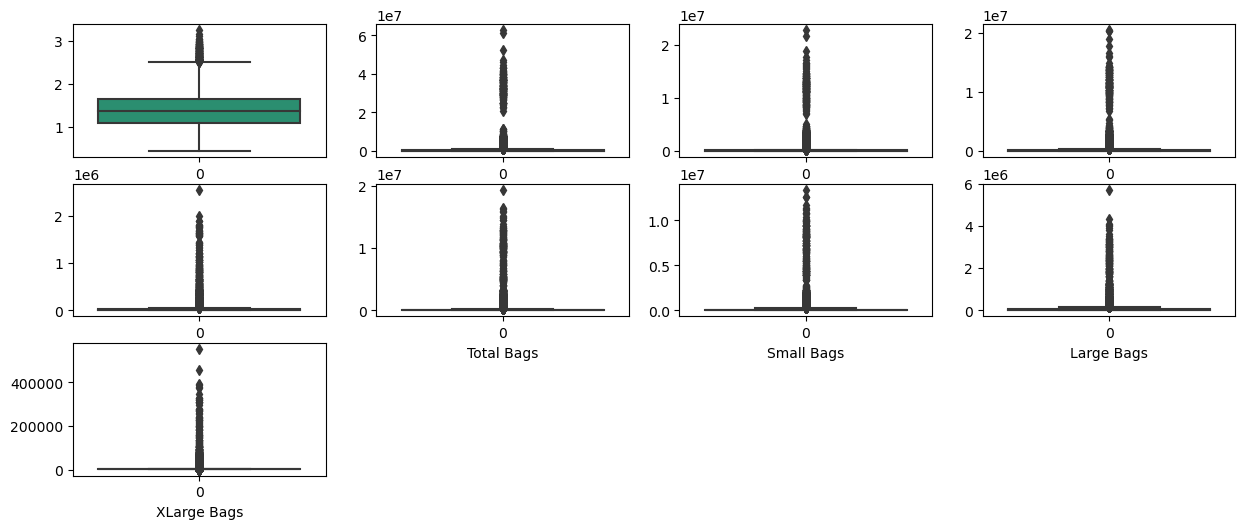

In [711]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df1[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if p<18:
        plt.subplot(5,4,p)
        sns.boxplot(df1[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [712]:
df1.drop('Date',axis=1,inplace=True)

In [713]:
from numpy import percentile
columns=df1.columns
for i in columns:
    if isinstance(df1[i][0],str):
        continue
    else:
        quartiles=percentile(df1[i],[25,75])
        lower_level=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_level=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df1[i]=df1[i].apply(lambda x: upper_level if x>upper_level else (lower_level if x < lower_level else x))

In [714]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,Albany,11,29


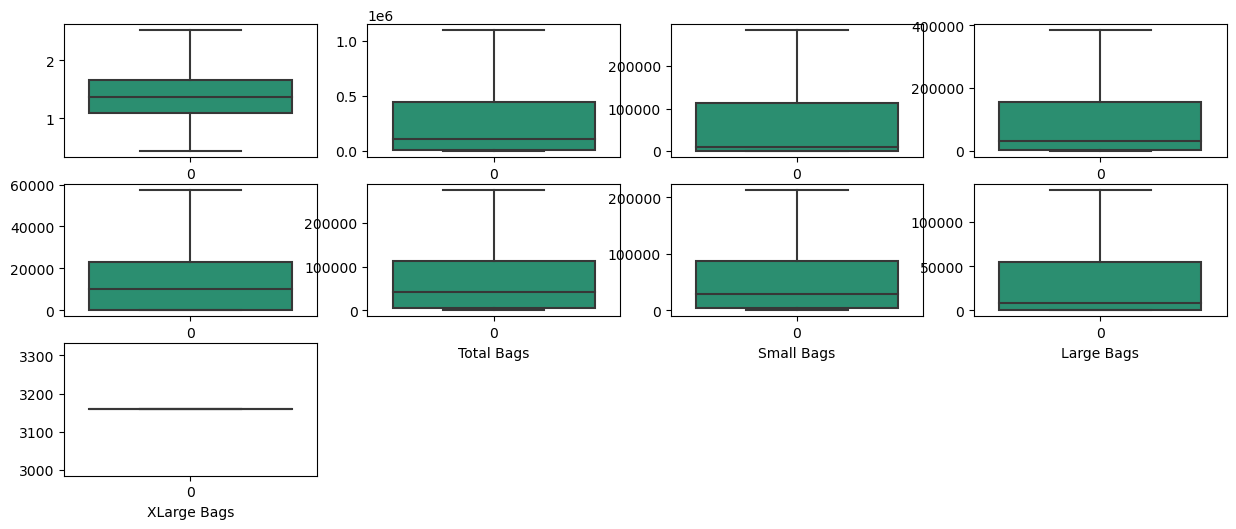

In [715]:
# check outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
p=1
for i in df1[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if p<18:
        plt.subplot(5,4,p)
        sns.boxplot(df1[i],palette='Dark2')
        plt.xlabel(i)
    p+=1
plt.show()

In [716]:
from sklearn.preprocessing import LabelEncoder
la_en=LabelEncoder()
df1['region']=la_en.fit_transform(df1['region'])

In [724]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,2015,11,29


Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month',
       'Day', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',
       'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsbu

In [718]:
from sklearn.preprocessing import LabelEncoder
la_en=LabelEncoder()
df1['type']=la_en.fit_transform(df1['type'])

In [725]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,2015,11,29


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,...,0,0,0,0,0,0,0,0,0,0


In [723]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'Month',
       'Day'],
      dtype='object')

In [726]:
df1.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
Month             int64
Day               int64
dtype: object

In [729]:
x=df1


In [730]:
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,0,2015,11,29


In [731]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [732]:
y.value_counts()

22    338
33    338
25    338
26    338
1     338
28    338
29    338
46    338
31    338
32    338
35    338
45    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
47    338
44    338
21    338
20    338
2     338
52    338
51    338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
48    338
15    338
16    338
17    338
18    338
19    338
4     337
34    336
24    336
53    335
0     332
14    331
50    329
5     314
3     308
30    307
27    290
23    280
49    253
Name: region, dtype: int64

In [733]:
y.nunique()

54

In [734]:
x.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
Month           0
Day             0
dtype: int64

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3158.875367,conventional,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3158.875367,conventional,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3158.875367,conventional,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3158.875367,conventional,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3158.875367,conventional,2015,0,11,29


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [735]:
x.shape

(17946, 13)

In [736]:
y.shape

(17946,)

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

In [737]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,-0.177464,-0.615452,-0.694313,-0.347465,-0.898980,-0.751220,-0.718935,-0.737229,9.094947e-13,-0.983092,-1.218065,1.645902,1.290556
1,-0.127022,-0.640185,-0.697871,-0.418995,-0.898366,-0.742749,-0.707958,-0.737125,9.094947e-13,-0.983092,-1.218065,1.645902,0.493224
2,-1.186313,-0.472801,-0.696689,0.051098,-0.894010,-0.756996,-0.726596,-0.736986,9.094947e-13,-0.983092,-1.218065,1.645902,-0.304107
3,-0.807995,-0.576461,-0.693377,-0.219785,-0.897506,-0.781444,-0.758866,-0.736233,9.094947e-13,-0.983092,-1.218065,1.645902,-1.101439
4,-0.303570,-0.650325,-0.695248,-0.424828,-0.897313,-0.777540,-0.754651,-0.734660,9.094947e-13,-0.983092,-1.218065,1.363137,1.518365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17941,0.579173,-0.740076,-0.684395,-0.733136,0.499844,-0.700926,-0.658031,-0.728898,9.094947e-13,1.017199,1.966114,-1.181748,-1.329248
17942,0.780942,-0.748497,-0.692791,-0.719274,0.499844,-0.745271,-0.714344,-0.731532,9.094947e-13,1.017199,1.966114,-1.464513,1.404460
17943,1.184482,-0.748818,-0.692789,-0.726406,-0.857952,-0.743917,-0.708725,-0.738483,9.094947e-13,1.017199,1.966114,-1.464513,0.607129
17944,1.335809,-0.742374,-0.689493,-0.722556,-0.858009,-0.727416,-0.687332,-0.738293,9.094947e-13,1.017199,1.966114,-1.464513,-0.190203


In [738]:
x.shape

(17946, 13)

In [739]:
x.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
Month           0
Day             0
dtype: int64

In [740]:
# lets use vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [741]:
vif

,VIF Values,features
0,1.972896,AveragePrice
1,38.602886,Total Volume
2,6.863733,4046
3,12.175905,4225
4,1.367853,4770
5,20.312047,Total Bags
6,10.487921,Small Bags
7,2.263711,Large Bags
8,1.000000,XLarge Bags
9,2.742214,type


In [764]:
x.drop('Total Volume',axis=1,inplace=True)


In [765]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [766]:
vif

,VIF Values,features
0,1.960411,AveragePrice
1,3.159635,4046
2,3.785987,4225
3,1.367703,4770
4,16.078223,Total Bags
5,10.486122,Small Bags
6,2.262416,Large Bags
7,1.000000,XLarge Bags
8,2.675545,type
9,1.200387,year


In [787]:
x.drop('Total Bags',axis=1,inplace=True)


In [788]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [789]:
vif

,VIF Values,features
0,1.885008,AveragePrice
1,3.035507,4046
2,3.636092,4225
3,1.349670,4770
4,3.667428,Small Bags
5,1.577452,Large Bags
6,1.000000,XLarge Bags
7,2.667680,type
8,1.117923,year
9,1.099637,Month


In [784]:
y.value_counts()

22    338
33    338
25    338
26    338
1     338
28    338
29    338
46    338
31    338
32    338
35    338
45    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
47    338
44    338
21    338
20    338
2     338
52    338
51    338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
48    338
15    338
16    338
17    338
18    338
19    338
4     337
34    336
24    336
53    335
0     332
14    331
50    329
5     314
3     308
30    307
27    290
23    280
49    253
Name: region, dtype: int64

In [790]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier


In [791]:
maxACC=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxRS=i
print('maximum accuracy ',maxACC,'on Random state ',maxRS)

maximum accuracy  0.8961002785515321 on Random state  83


In [792]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRS)


In [793]:
# randomForestclassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_RFC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_RFC))
print("\nclassification report \n\n",classification_report(y_test,pred_RFC))

Accuracy score  0.8930362116991644
confusion matrix 

 [[70  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  1]
 [ 0  0 74 ...  0  0  0]
 ...
 [ 0  0  0 ... 62 13  0]
 [ 0  0  0 ...  4 48  0]
 [ 0  0  0 ...  0  0 58]]

classification report 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88        76
           1       0.88      0.90      0.89        58
           2       0.99      0.97      0.98        76
           3       0.98      0.90      0.94        59
           4       0.98      0.91      0.94        65
           5       0.95      0.84      0.89        68
           6       0.79      0.81      0.80        64
           7       0.96      0.96      0.96        68
           8       0.95      0.93      0.94        68
           9       0.86      0.94      0.90        71
          10       0.86      0.88      0.87        72
          11       0.91      0.94      0.93        66
          12       0.97      0.97      0.97        62
      

In [794]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_LR))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_LR))
print("\nclassification report \n\n",classification_report(y_test,pred_LR))

Accuracy score  0.39080779944289695
confusion matrix 

 [[30  0  0 ...  0  0  0]
 [ 0 17  0 ...  0  0  2]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 76  1  0]
 [ 0  0  0 ...  9 18  0]
 [ 0  9  0 ...  0  0 11]]

classification report 

               precision    recall  f1-score   support

           0       0.42      0.39      0.41        76
           1       0.26      0.29      0.28        58
           2       0.71      0.39      0.51        76
           3       0.26      0.46      0.33        59
           4       0.57      0.46      0.51        65
           5       0.45      0.37      0.40        68
           6       0.48      0.55      0.51        64
           7       0.59      0.15      0.24        68
           8       0.60      0.76      0.68        68
           9       0.36      0.49      0.42        71
          10       0.14      0.26      0.19        72
          11       0.47      0.42      0.45        66
          12       0.32      0.45      0.37        62
     

In [795]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
pred_SVM=SVM.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_SVM))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_SVM))
print("\nclassification report \n\n",classification_report(y_test,pred_SVM))

Accuracy score  0.5348189415041783
confusion matrix 

 [[52  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 66  8  0]
 [ 0  0  0 ...  5 51  0]
 [ 2  2  0 ...  0  0 26]]

classification report 

               precision    recall  f1-score   support

           0       0.34      0.68      0.46        76
           1       0.38      0.47      0.42        58
           2       0.91      0.51      0.66        76
           3       0.78      0.47      0.59        59
           4       0.57      0.58      0.58        65
           5       0.69      0.46      0.55        68
           6       0.68      0.59      0.63        64
           7       0.62      0.59      0.61        68
           8       0.70      0.49      0.57        68
           9       0.58      0.46      0.52        71
          10       0.74      0.32      0.45        72
          11       0.27      0.64      0.38        66
          12       0.52      0.69      0.59        62
      

In [796]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_GBC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_GBC))
print("\nclassification report \n\n",classification_report(y_test,pred_GBC))

Accuracy score  0.8089136490250697
confusion matrix 

 [[67  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  1]
 [ 0  0 70 ...  0  0  2]
 ...
 [ 0  0  0 ... 67  5  0]
 [ 0  0  0 ...  6 44  0]
 [ 0  1  0 ...  0  0 53]]

classification report 

               precision    recall  f1-score   support

           0       0.87      0.88      0.88        76
           1       0.68      0.71      0.69        58
           2       0.91      0.92      0.92        76
           3       0.81      0.78      0.79        59
           4       0.87      0.83      0.85        65
           5       0.80      0.71      0.75        68
           6       0.75      0.81      0.78        64
           7       0.83      0.87      0.85        68
           8       0.94      0.91      0.93        68
           9       0.83      0.77      0.80        71
          10       0.71      0.78      0.74        72
          11       0.89      0.83      0.86        66
          12       0.91      0.84      0.87        62
      

In [797]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ABC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ABC))
print("\nclassification report \n\n",classification_report(y_test,pred_ABC))

Accuracy score  0.04958217270194986
confusion matrix 

 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  0  0]
 ...
 [ 0  0  0 ... 61  0  0]
 [ 0  0  0 ... 34  0  0]
 [ 0  0  0 ...  0  0  0]]

classification report 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        76
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        65
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00        68
           8       0.07      0.41      0.13        68
           9       0.00      0.00      0.00        71
          10       0.00      0.00      0.00        72
          11       0.00      0.00      0.00        66
          12       0.00      0.00      0.00        62
     

In [798]:
from sklearn.ensemble import BaggingClassifier
BAGG=BaggingClassifier()
BAGG.fit(x_train,y_train)
pred_BAGG=BAGG.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_BAGG))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_BAGG))
print("\nclassification report \n\n",classification_report(y_test,pred_BAGG))

Accuracy score  0.8342618384401114
confusion matrix 

 [[68  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  1]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  9  0]
 [ 0  0  0 ...  5 42  0]
 [ 0  1  0 ...  0  0 49]]

classification report 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.70      0.76      0.73        58
           2       0.96      0.93      0.95        76
           3       0.86      0.85      0.85        59
           4       0.90      0.86      0.88        65
           5       0.79      0.82      0.81        68
           6       0.74      0.84      0.79        64
           7       0.87      0.85      0.86        68
           8       0.93      0.97      0.95        68
           9       0.83      0.89      0.86        71
          10       0.72      0.75      0.73        72
          11       0.81      0.86      0.84        66
          12       0.92      0.92      0.92        62
      

In [799]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_DT))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_DT))
print("\nclassification report \n\n",classification_report(y_test,pred_DT))

Accuracy score  0.7827298050139275
confusion matrix 

 [[69  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 68  5  0]
 [ 0  0  0 ...  3 46  0]
 [ 0  2  1 ...  0  0 49]]

classification report 

               precision    recall  f1-score   support

           0       0.85      0.91      0.88        76
           1       0.70      0.78      0.74        58
           2       0.91      0.84      0.88        76
           3       0.80      0.81      0.81        59
           4       0.81      0.78      0.80        65
           5       0.81      0.79      0.80        68
           6       0.66      0.77      0.71        64
           7       0.92      0.90      0.91        68
           8       0.96      0.94      0.95        68
           9       0.74      0.80      0.77        71
          10       0.68      0.62      0.65        72
          11       0.83      0.83      0.83        66
          12       0.91      0.85      0.88        62
      

In [800]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_KNN))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_KNN))
print("\nclassification report \n\n",classification_report(y_test,pred_KNN))

Accuracy score  0.39442896935933147
confusion matrix 

 [[24  2  0 ...  0  0  0]
 [ 3 25  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 54  7  0]
 [ 0  0  0 ...  8 28  0]
 [ 3  2  1 ...  0  0 26]]

classification report 

               precision    recall  f1-score   support

           0       0.19      0.32      0.24        76
           1       0.14      0.43      0.21        58
           2       0.34      0.58      0.43        76
           3       0.17      0.34      0.22        59
           4       0.32      0.54      0.40        65
           5       0.22      0.35      0.27        68
           6       0.35      0.39      0.37        64
           7       0.27      0.49      0.35        68
           8       0.37      0.47      0.42        68
           9       0.28      0.44      0.34        71
          10       0.13      0.21      0.16        72
          11       0.41      0.50      0.45        66
          12       0.45      0.74      0.56        62
     

In [801]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=KNeighborsClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print("Accuracy score ",accuracy_score(y_test,pred_ETC))
print("confusion matrix \n\n",confusion_matrix(y_test,pred_ETC))
print("\nclassification report \n\n",classification_report(y_test,pred_ETC))

Accuracy score  0.39442896935933147
confusion matrix 

 [[24  2  0 ...  0  0  0]
 [ 3 25  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  0]
 ...
 [ 0  0  0 ... 54  7  0]
 [ 0  0  0 ...  8 28  0]
 [ 3  2  1 ...  0  0 26]]

classification report 

               precision    recall  f1-score   support

           0       0.19      0.32      0.24        76
           1       0.14      0.43      0.21        58
           2       0.34      0.58      0.43        76
           3       0.17      0.34      0.22        59
           4       0.32      0.54      0.40        65
           5       0.22      0.35      0.27        68
           6       0.35      0.39      0.37        64
           7       0.27      0.49      0.35        68
           8       0.37      0.47      0.42        68
           9       0.28      0.44      0.34        71
          10       0.13      0.21      0.16        72
          11       0.41      0.50      0.45        66
          12       0.45      0.74      0.56        62
     

In [802]:
# cross validation score with RandomForest
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print('accuracy score ',accuracy_score(y_test,pred_RFC))
print(score)
print(score.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_RFC)-score.mean())

accuracy score  0.8930362116991644
[0.60250696 0.74031764 0.72582892 0.64976317 0.48732237]
0.641147812373152
The deference between accuracy score and cross validation score : 0.25188839932601237


In [803]:
score1=cross_val_score(LR,x,y)
print('accuracy score ',accuracy_score(y_test,pred_LR))
print(score1)
print(score1.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_LR)-score1.mean())

accuracy score  0.39080779944289695
[0.39777159 0.51574255 0.33964893 0.13820006 0.13513514]
0.3052996505105744
The deference between accuracy score and cross validation score : 0.08550814893232256


In [804]:
score2=cross_val_score(SVM,x,y)
print('accuracy score ',accuracy_score(y_test,pred_SVM))
print(score2)
print(score2.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_SVM)-score2.mean())

accuracy score  0.5348189415041783
[0.49693593 0.63833937 0.41153525 0.19058233 0.14572304]
0.37662318551500984
The deference between accuracy score and cross validation score : 0.15819575598916846


In [782]:
score3=cross_val_score(DT,x,y)
print('accuracy score ',accuracy_score(y_test,pred_DT))
print(score3)
print(score3.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_DT)-score3.mean())

accuracy score  0.7651810584958217
[0.42228412 0.60128169 0.57063249 0.50654778 0.3967679 ]
0.4995027983213952
The deference between accuracy score and cross validation score : 0.26567826017442653


In [783]:
score4=cross_val_score(KNN,x,y)
print('accuracy score ',accuracy_score(y_test,pred_KNN))
print(score4)
print(score4.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_KNN)-score4.mean())

accuracy score  0.4064066852367688
[0.39888579 0.48007802 0.31847311 0.14210086 0.13262747]
0.2944330517807817
The deference between accuracy score and cross validation score : 0.1119736334559871


In [761]:
score5=cross_val_score(ABC,x,y)
print('accuracy score ',accuracy_score(y_test,pred_ABC))
print(score5)
print(score5.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ABC)-score5.mean())

accuracy score  0.08551532033426183
[0.06072423 0.05851212 0.04430203 0.07300084 0.06046252]
0.0594003497222634
The deference between accuracy score and cross validation score : 0.026114970611998432


In [805]:
score6=cross_val_score(BAGG,x,y)
print('accuracy score ',accuracy_score(y_test,pred_BAGG))
print(score6)
print(score6.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_BAGG)-score6.mean())

accuracy score  0.8342618384401114
[0.51643454 0.67957648 0.68013374 0.57592644 0.43076066]
0.5765663731100368
The deference between accuracy score and cross validation score : 0.2576954653300746


In [806]:
score7=cross_val_score(ETC,x,y)
print('accuracy score ',accuracy_score(y_test,pred_ETC))
print(score7)
print(score7.mean())
print("The deference between accuracy score and cross validation score :", accuracy_score(y_test,pred_ETC)-score7.mean())

accuracy score  0.39442896935933147
[0.40194986 0.46698245 0.30899972 0.13624965 0.12538312]
0.28791295904927694
The deference between accuracy score and cross validation score : 0.10651601031005453
